In [254]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
from math import cos
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde 
import random


In [581]:
def build_signal_and_observations(T):
    random.seed(100)
    #x0 = np.random.normal(scale=5, size=1)
    x0=0
    x_true = np.ones(T)*x0
    y_true = np.ones(T)*x0
    for t in range(T-1):
        x_t = x_true[t]
        #x_true[t+1] = 0.5*x_t + 25*x_t/(1+x_t**2) + 8*np.cos(1.2*(t+1))
        x_true[t+1] = predict(x_t,t)
        y_true[t+1] = measurement_model(predict(x_t,t))
    
    return x_true, y_true

In [358]:
def predict(x_t,t):
    random.seed(100)
    v_t = np.random.normal(scale=10, size=1)
    x_new = 0.5*x_t + 25*x_t/(1+x_t**2) + 8*np.cos(1.2*(t+1)) + v_t
    return x_new

In [359]:
def measurement_model(x_t):
    random.seed(100)
    w_t = np.random.normal(scale=1, size=1)
    y_t = x_t**2/20 + w_t
    return y_t


In [565]:
def initial_particle_set(N,T):
    ## XX constains particle sets for each timestep
    random.seed(100)
    X = [np.random.normal(0,12,size=1) for i in range(N)] # initialize set with all samples drawn from priori
    XX = np.zeros((T,N))
    XX[0,:] = X[:]
    return XX

In [412]:
def weight(y_t, X_t):
    random.seed(100)
    # nu is difference between true observation and expected observation from x_t
    nu = y_t -X_t**2/20
    return st.multivariate_normal.pdf(nu,0,1)

In [549]:
def bootstrap_filter(y_true,N):
    random.seed(100)
    # Init
    T= len(y_true)
    X = initial_particle_set(N,T)
    W = 1/N*np.ones((N,1))

    for t in range(1,T):
        # Predict Step
        X[t,:] = [predict(X[t-1,i],t) for i in range(N)]

        # Weight (more stable)
        W = st.norm.logpdf(y_true[t], loc=X[t,:]**2/20, scale=1)
        # Calculate the max of the weights
        max_weights = np.max(W)
        # Subtract the max
        W = W - max_weights
        # Normalize weights to be probabilities
        W = np.exp(W) / np.sum(np.exp(W))

        # Weight(straight forward, not that stable)
        #W = weight(y_true[t],X[t,:])
        #W = W/sum(W)

        # Selection Step(resampling)
        X[t,:] = np.random.choice(X[t,:], N,replace = True, p=W)
    return X
    



In [599]:
def plot_filter_density_propogation(X,T,N):
    # plot the filter distributions
    
    fig = plt.figure();fig.clf()
    ax = plt.axes(projection="3d")
    ax.azim, ax.elev = (210,50)
    for i in range(10,100,10):
        density = gaussian_kde(X[i,:])
        xs = np.linspace(-25,25,300)
        ax.plot3D(xs, i+np.zeros(len(xs)),density(xs),'red')
    plt.title(str(N)+" Particles")
    ax.set_xlim(-25, 25)
    ax.set_ylim(0, 100)
    ax.set_zlim(0, 0.4)
    ax.set_xlabel(r'x_t')
    ax.set_ylabel('Time (t)')
    #ax.set_zlabel(r'$p(x_t|y_{1:t})$')
    ax.text(-29, 100, 0.4, r'$p(x_t|y_{1:t})$')
    plt.show()

In [590]:
# data generation
T = 200 # list of timesteps
x_true, y_true = build_signal_and_observations(T)


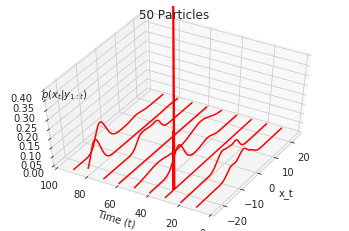

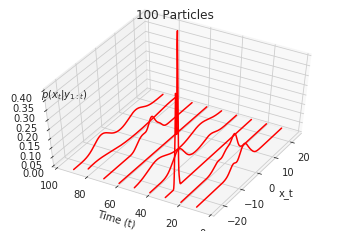

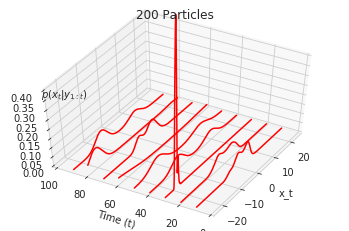

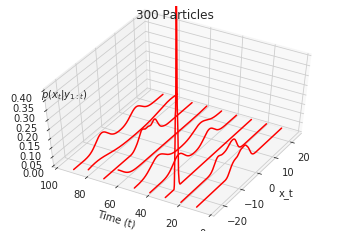

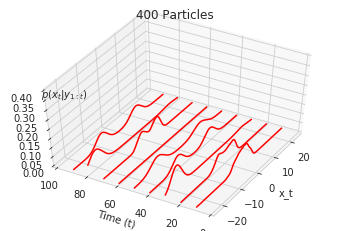

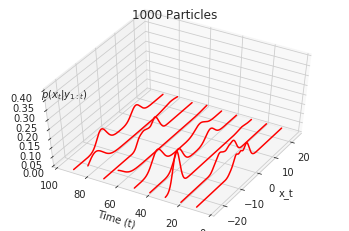

In [604]:
# plot the filter distributions
plot_filter_density_propogation(bootstrap_filter(y_true,50),T,50)
plot_filter_density_propogation(bootstrap_filter(y_true,100),T,100)
plot_filter_density_propogation(bootstrap_filter(y_true,200),T,200)
plot_filter_density_propogation(bootstrap_filter(y_true,300),T,300)
plot_filter_density_propogation(bootstrap_filter(y_true,400),T,400)
plot_filter_density_propogation(bootstrap_filter(y_true,1000),T,1000)

Text(0, 0.5, 'State x_t')

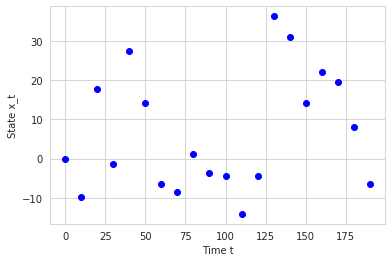

In [592]:
# True state as function of time
plt.plot(np.arange(len(x_true))[0:-1:10],-x_true[0:-1:10],'bo')
plt.xlabel("Time t")
plt.ylabel("State x_t")

In [461]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: midle;
    vertical-align: middle;
}
</style>
""")